#**IT496 Intoduction to Data Mining**
##**Course Project - 3**


###**Imports**

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import pandas as pd
import numpy as np
import os
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
import networkx as nx
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import tree
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [2]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


####**Task-1 : Unleash Your Creativity**
You can choose two specific problem statements or prediction tasks related to the ICC Cricket
World Cup 2023.

Some examples of problem statements include:

● Predicting the batsman who will hit most sixes in
the tournament.

● Predicting the bowler who will be the leading wicket-taker and the 4 wicket hauls in the tournament.


Data Scrapping was done from the following site:

URL :

1. https://www.espncricinfo.com/records/tournament/batting-most-runs-career/icc-cricket-world-cup-2023-24-15338

2. https://www.espncricinfo.com/records/tournament/bowling-most-wickets-career/icc-cricket-world-cup-2023-24-15338

###**Loading Datasets**
Here we are using 2 datasets :

1. Batters2023 - includes all the necessary information of top batsman in ICC World Cup 2023.

2. Bowlers 2023 - includes all the necessary information of top bowlers in ICC World Cup 2023.

**NOTE :** All the injured players were dropped from the dataset for better results.

In [4]:
df1 = pd.read_csv("/content/Batters2023.csv")
df1.head(10)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,GJ Maxwell (AUS),7,7,2,397,201,79.40,260,152.69,2,0,1,40,22
1,1,RG Sharma (IND),8,8,0,442,131,55.25,360,122.77,1,2,1,50,22
2,2,Q de Kock (SA),9,9,0,591,174,65.66,541,109.24,4,0,0,57,21
3,3,DA Warner (AUS),9,8,0,446,163,55.75,412,108.25,2,1,0,42,20
4,4,Fakhar Zaman (PAK),4,3,1,219,126,109.50,170,128.82,1,1,0,14,18
5,5,H Klaasen (SA),9,9,1,326,109,40.75,232,140.51,1,1,0,24,17
6,6,R Ravindra (NZ),9,9,1,565,123,70.62,521,108.44,3,2,0,52,17
7,7,DJ Mitchell (NZ),9,8,1,418,130,59.71,378,110.58,1,2,0,39,15
8,8,BKG Mendis (SL),9,9,0,294,122,32.66,258,113.95,1,1,0,27,15
9,9,DA Miller (SA),9,9,2,255,53,36.42,214,119.15,0,1,0,17,15


In [5]:
df2 = pd.read_csv("/content/Bowlers2023.csv")
df2.head(10)

,Unnamed: 0,Player,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,0,A Zampa (AUS),9,9,432,72.0,1,389,21,04-Aug,18.52,5.40,20.57,3,0
1,1,D Madushanka (SL),9,9,470,78.2,4,525,21,May-80,25.00,6.70,22.38,1,1
2,2,G Coetzee (SA),7,7,327,54.3,1,349,18,Apr-44,19.38,6.40,18.16,1,0
3,3,M Jansen (SA),8,8,388,64.4,3,415,17,Mar-31,24.41,6.41,22.82,0,0
4,4,Mohammed Shami (IND),4,4,156,26.0,3,112,16,May-18,7.00,4.30,9.75,1,2
5,5,MJ Santner (NZ),9,9,496,82.4,3,398,16,May-59,24.87,4.81,31.00,0,1
6,6,Shaheen Shah Afridi (PAK),8,8,426,71.0,2,409,16,May-54,25.56,5.76,26.62,0,1
7,7,JJ Bumrah (IND),8,8,383,63.5,5,233,15,Apr-39,15.53,3.65,25.53,1,0
8,8,RA Jadeja (IND),8,8,387,64.3,4,243,14,May-33,17.35,3.76,27.64,0,1
9,9,KA Maharaj (SA),9,9,474,79.0,1,346,14,Apr-46,24.71,4.37,33.85,1,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  91 non-null     int64  
 1   Player      91 non-null     object 
 2   Mat         91 non-null     int64  
 3   Inns        91 non-null     int64  
 4   NO          91 non-null     int64  
 5   Runs        91 non-null     int64  
 6   HS          91 non-null     int64  
 7   Ave         91 non-null     float64
 8   BF          91 non-null     int64  
 9   SR          91 non-null     float64
 10  100         91 non-null     int64  
 11  50          91 non-null     int64  
 12  0           91 non-null     int64  
 13  4s          91 non-null     int64  
 14  6s          91 non-null     int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 10.8+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  63 non-null     int64  
 1   Player      63 non-null     object 
 2   Mat         63 non-null     int64  
 3   Inns        63 non-null     int64  
 4   Balls       63 non-null     int64  
 5   Overs       63 non-null     float64
 6   Mdns        63 non-null     int64  
 7   Runs        63 non-null     int64  
 8   Wkts        63 non-null     int64  
 9   BBI         63 non-null     object 
 10  Ave         63 non-null     float64
 11  Econ        63 non-null     float64
 12  SR          63 non-null     float64
 13  4           63 non-null     int64  
 14  5           63 non-null     int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 7.5+ KB


##**Data Cleaning**

Unnecessary columns were removed

In [8]:
selected_columns = df2[['Unnamed: 0', 'BBI']]

In [9]:
df2.drop(columns=selected_columns, inplace=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  63 non-null     object 
 1   Mat     63 non-null     int64  
 2   Inns    63 non-null     int64  
 3   Balls   63 non-null     int64  
 4   Overs   63 non-null     float64
 5   Mdns    63 non-null     int64  
 6   Runs    63 non-null     int64  
 7   Wkts    63 non-null     int64  
 8   Ave     63 non-null     float64
 9   Econ    63 non-null     float64
 10  SR      63 non-null     float64
 11  4       63 non-null     int64  
 12  5       63 non-null     int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 6.5+ KB


In [11]:
df1.drop(['Unnamed: 0'],inplace=True,axis=1)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  91 non-null     object 
 1   Mat     91 non-null     int64  
 2   Inns    91 non-null     int64  
 3   NO      91 non-null     int64  
 4   Runs    91 non-null     int64  
 5   HS      91 non-null     int64  
 6   Ave     91 non-null     float64
 7   BF      91 non-null     int64  
 8   SR      91 non-null     float64
 9   100     91 non-null     int64  
 10  50      91 non-null     int64  
 11  0       91 non-null     int64  
 12  4s      91 non-null     int64  
 13  6s      91 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 10.1+ KB


##**Preprocessing**

In [20]:
label_encoder2 = LabelEncoder()
df2['Player'] = label_encoder2.fit_transform(df2['Player'])

In [21]:
label_encoder1 = LabelEncoder()
df1['Player'] = label_encoder1.fit_transform(df1['Player'])

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  91 non-null     int64  
 1   Mat     91 non-null     int64  
 2   Inns    91 non-null     int64  
 3   NO      91 non-null     int64  
 4   Runs    91 non-null     int64  
 5   HS      91 non-null     int64  
 6   Ave     91 non-null     float64
 7   BF      91 non-null     int64  
 8   SR      91 non-null     float64
 9   100     91 non-null     int64  
 10  50      91 non-null     int64  
 11  0       91 non-null     int64  
 12  4s      91 non-null     int64  
 13  6s      91 non-null     int64  
dtypes: float64(2), int64(12)
memory usage: 10.1 KB


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  63 non-null     int64  
 1   Mat     63 non-null     int64  
 2   Inns    63 non-null     int64  
 3   Balls   63 non-null     int64  
 4   Overs   63 non-null     float64
 5   Mdns    63 non-null     int64  
 6   Runs    63 non-null     int64  
 7   Wkts    63 non-null     int64  
 8   Ave     63 non-null     float64
 9   Econ    63 non-null     float64
 10  SR      63 non-null     float64
 11  4       63 non-null     int64  
 12  5       63 non-null     int64  
dtypes: float64(4), int64(9)
memory usage: 6.5 KB


In [16]:
df1.shape

(91, 14)

## **Test-train split and normalization on Batsman Data**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df1,df1["6s"], test_size=0.2, random_state=42)
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((72, 14), (19, 14))

In [33]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(objective='reg:squarederror'),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)
]

# Store results in a dictionary
results = {'Model': [], 'Mean Squared Error': [], 'R-squared': []}

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    results['Model'].append(model.__class__.__name__)
    results['Mean Squared Error'].append(mse)
    results['R-squared'].append(r_squared)

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(results)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 13
[LightGBM] [Info] Start training from score 5.458333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [31]:
results_df

,Model,Mean Squared Error,R-squared
0,LinearRegression,8.017474e-28,1.000000
1,Ridge,9.145752e-05,0.999997
2,Lasso,1.790930e-01,0.994673
3,DecisionTreeRegressor,5.789474e-01,0.982779
4,RandomForestRegressor,5.173158e-01,0.984612
5,XGBRegressor,1.509079e-01,0.995511
6,KNeighborsRegressor,2.272632e+01,0.323978
7,GradientBoostingRegressor,1.515547e-01,0.995492
8,LGBMRegressor,9.120660e+00,0.728695
9,CatBoostRegressor,5.103208e+00,0.848199


## **Neural network training**

In [ ]:
model_1 = Sequential()
model_1.add(Dense(128, input_shape = [14], activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='linear'))

model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model_1.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

loss, mae = model_1.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Epoch 1/200
2/2 [==============================] - 1s 170ms/step - loss: 45.4006 - mae: 4.7243 - val_loss: 79.6475 - val_mae: 6.2049
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 42.8070 - mae: 4.4775 - val_loss: 75.1853 - val_mae: 5.9583
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 39.5717 - mae: 4.2374 - val_loss: 70.7429 - val_mae: 5.7339
Epoch 4/200
2/2 [==============================] - 0s 35ms/step - loss: 37.2667 - mae: 4.0563 - val_loss: 65.7892 - val_mae: 5.5013
Epoch 5/200
2/2 [==============================] - 0s 32ms/step - loss: 34.3571 - mae: 3.8731 - val_loss: 60.6857 - val_mae: 5.2557
Epoch 6/200
2/2 [==============================] - 0s 33ms/step - loss: 31.5285 - mae: 3.6749 - val_loss: 55.3391 - val_mae: 4.9755
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 28.5086 - mae: 3.4713 - val_loss: 49.5511 - val_mae: 4.7327
Epoch 8/200
2/2 [==============================] - 0s 40ms/step - loss: 25.

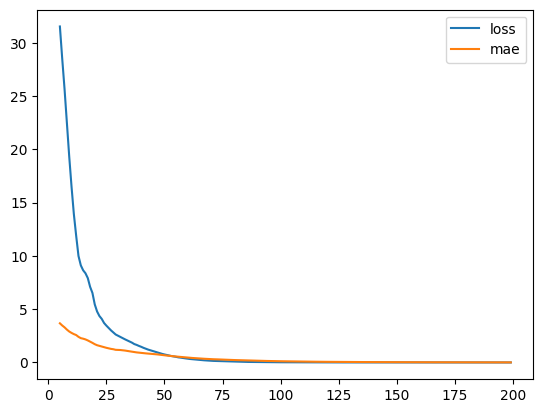

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss','mae']].plot();

In [ ]:
all_sixes_predictions = model_1.predict(size_scaler.transform(df1))
all_sixes_predictions = all_sixes_predictions.flatten()
top_five_indices = all_sixes_predictions.argsort()[-5:][::-1]
top_five_players_decoded = label_encoder1.inverse_transform(df1.index[top_five_indices])
for i, player_decoded in enumerate(top_five_players_decoded, 1):
    print(f"{i} batsman predicted to hit the most sixes: {player_decoded}")

3/3 [==============================] - 0s 5ms/step
1 batsman predicted to hit the most sixes: AK Markram (SA)
2 batsman predicted to hit the most sixes: A Dutt (NED)
3 batsman predicted to hit the most sixes: AD Mathews (SL)
4 batsman predicted to hit the most sixes: AL Phehlukwayo (SA)
5 batsman predicted to hit the most sixes: AU Rashid (ENG)


#**Now we split data and normalize for bowlers dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,df2["4"], test_size=0.2, random_state=42)
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((50, 13), (13, 13))

In [ ]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(objective='reg:squarederror'),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    LGBMRegressor(),
    CatBoostRegressor(silent=True)
]

# Store results in a dictionary
results = {'Model': [], 'Mean Squared Error': [], 'R-squared': []}

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    results['Model'].append(model.__class__.__name__)
    results['Mean Squared Error'].append(mse)
    results['R-squared'].append(r_squared)

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(results)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 11
[LightGBM] [Info] Start training from score 0.220000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
results_df

,Model,Mean Squared Error,R-squared
0,LinearRegression,3.467591e-31,1.000000
1,Ridge,1.046923e-02,0.985006
2,Lasso,6.398359e-01,0.083625
3,DecisionTreeRegressor,3.076923e-01,0.559322
4,RandomForestRegressor,3.076923e-01,0.559322
5,XGBRegressor,3.077619e-01,0.559222
6,KNeighborsRegressor,8.369231e-01,-0.198644
7,GradientBoostingRegressor,3.076987e-01,0.559313
8,LGBMRegressor,6.611974e-01,0.053031
9,CatBoostRegressor,3.524386e-01,0.495236


In [ ]:
model_1 = Sequential()
model_1.add(Dense(128, input_shape = [13], activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='linear'))

model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model_1.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

loss, mae = model_1.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Epoch 1/200
2/2 [==============================] - 1s 177ms/step - loss: 0.2325 - mae: 0.3211 - val_loss: 0.2187 - val_mae: 0.3055
Epoch 2/200
2/2 [==============================] - 0s 37ms/step - loss: 0.1239 - mae: 0.2136 - val_loss: 0.1624 - val_mae: 0.2861
Epoch 3/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0784 - mae: 0.1966 - val_loss: 0.1270 - val_mae: 0.2661
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0545 - mae: 0.1815 - val_loss: 0.0968 - val_mae: 0.2383
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0374 - mae: 0.1548 - val_loss: 0.0721 - val_mae: 0.2093
Epoch 6/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0256 - mae: 0.1232 - val_loss: 0.0556 - val_mae: 0.1863
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0186 - mae: 0.1043 - val_loss: 0.0460 - val_mae: 0.1756
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0162 - mae: 0.1

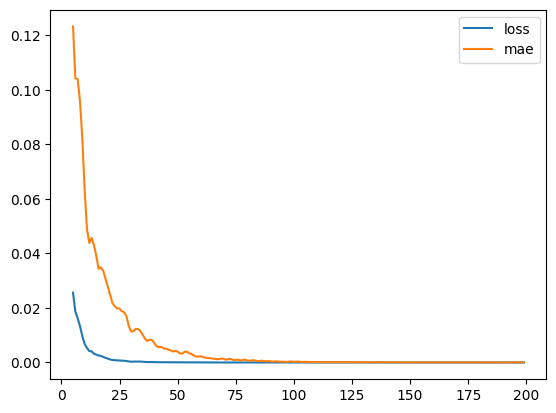

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss','mae']].plot();

In [ ]:
all_4_wkt_predictions = model_1.predict(size_scaler.transform(df2))
all_4_wkt_predictions = all_4_wkt_predictions.flatten()
top_five_indices = all_4_wkt_predictions.argsort()[-5:][::-1]
top_five_players_decoded = label_encoder2.inverse_transform(df2.index[top_five_indices])
for i, player_decoded in enumerate(top_five_players_decoded, 1):
    print(f"{i} bowler predicted to take the most 4 wicket-hauls : {player_decoded}")

2/2 [==============================] - 0s 6ms/step
1 bowler predicted to take the most 4 wicket-hauls : A Dutt (NED)
2 bowler predicted to take the most 4 wicket-hauls : Mohammad Wasim (PAK)
3 bowler predicted to take the most 4 wicket-hauls : A Zampa (AUS)
4 bowler predicted to take the most 4 wicket-hauls : M Jansen (SA)
5 bowler predicted to take the most 4 wicket-hauls : AAP Atkinson (ENG)


###**Predicting the bowler who will be the leading wicket-taker in the tournament.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,df2["Wkts"], test_size=0.2, random_state=42)
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((50, 13), (13, 13))

In [ ]:
all_wkt_predictions = model_1.predict(size_scaler.transform(df2))
all_wkt_predictions = all_4_wkt_predictions.flatten()
top_five_indices = all_wkt_predictions.argsort()[-5:][::-1]
top_players_decoded = label_encoder2.inverse_transform(df2.index[top_five_indices])
for i, player_decoded in enumerate(top_players_decoded, 1):
    print(f"{i} bowler predicted to take the most wickets : {player_decoded}")

2/2 [==============================] - 0s 5ms/step
1 bowler predicted to take the most wickets : A Dutt (NED)
2 bowler predicted to take the most wickets : Mohammad Wasim (PAK)
3 bowler predicted to take the most wickets : A Zampa (AUS)
4 bowler predicted to take the most wickets : M Jansen (SA)
5 bowler predicted to take the most wickets : AAP Atkinson (ENG)
